### <b> StatsModels from python
So far, we have discussed how MA can be used for estimating the trend-cycle and seasonal components of a time series. The method of MA works under the simple assumption that seasonal changes are constant over consecutive years, weeks, or a period suitable for the given use case. However, constant seasonality might be valid for several applications that require advanced method such as Seasonality and Trend decomposition using Locally Weighted Smoothing of Scatter plot also commonly referred as the STL method.

This notebook illustrates time series decomposition by the statsmodels package. Both additive and multiplicative models are demonstrated.

In [1]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Let us demonstrate the addtive model using Wisconsin Employment Jan. 1961 – OCt. 1975 dataset
# read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv(
    '../Data Files/wisconsin-employment-time-series.csv', index_col=['Month'], parse_dates=['Month']
)

In [3]:
# Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 1)


In [4]:
# Let's see first 5 rows of it
wisc_emp.head(5)

,Employment
Month,
1961-01-01,239.6
1961-02-01,236.4
1961-03-01,236.8
1961-04-01,241.5
1961-05-01,243.7


In [5]:
# Check for missing values and remove the row
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp.index))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [6]:
# Run ADF test on the original time series
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.9810000189539189


In [7]:
decompose_model = seasonal.seasonal_decompose(
    wisc_emp.Employment.tolist(), freq=12, model='additive'
)

In [8]:
decompose_model

The trend-cycle, seasonal, and residual components of the decomposed time series are accessible through the attributes of the object decompose_model returned by the seasonal.seasonal_decompose function. These components are can be obtained from the following attributes of the decompose_model:

- decompose_model.trend - Trend-cycle component
- decompose_model.seasonal - Seasonal component
- decompose_model.resid - Irregular variations


In [9]:
type(decompose_model.trend)

numpy.ndarray

In [10]:
decompose_model.trend[0:9]

array([         nan,          nan,          nan,          nan,
                nan,          nan, 244.59166667, 244.47916667,
       244.42083333])

In [11]:
decompose_model.seasonal[0:9]

array([ -7.06130189, -11.14790904, -10.07052808,  -4.48600427,
        -0.2333486 ,   2.09934371,   0.78661477,   1.13066239,
         1.6401862 ])

In [12]:
decompose_model.resid[0:9]

array([        nan,         nan,         nan,         nan,         nan,
               nan, -1.27828144, -1.40982906, -1.26101954])

(array([-108,  -84,  -60,  -36,  -12,   12,   36,   60]),
 <a list of 8 Text xticklabel objects>)

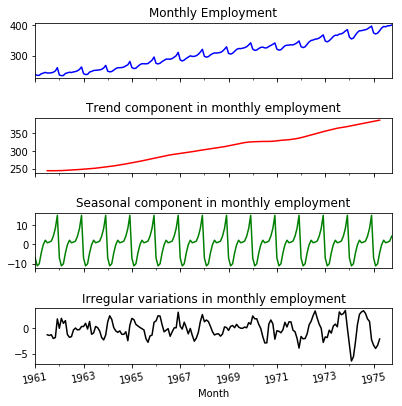

In [13]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

In [14]:
# Run ADF test on the irregular variations
adf_result = stattools.adfuller(
    decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag='AIC'
)
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634641524


The additive decompostion has been able to reduce the p-value from 0.98 in case of the original time series
to 0.066 after decomposing. Now we will attempt decomposition of the original time using a multiplicative model. 

In [15]:
decompose_model = seasonal.seasonal_decompose(
    wisc_emp.Employment.tolist(), freq=12, model='multiplicative'
)

Text(0.5,1,'Irregular variations in monthly employment')

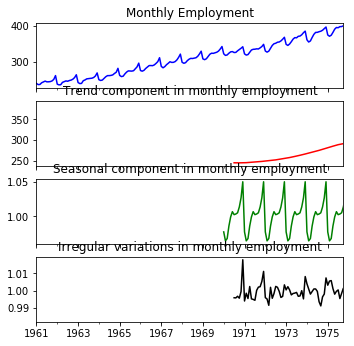

In [16]:
# Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

In [17]:
# Run ADF test on the irregular variations
adf_result = stattools.adfuller(
    decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag='AIC'
)
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267731921


Voila! The p-val has further reduced 0.00123. The null hypothesis about non-stationarity of the irregular variations can be rejected at even a level of confidence of 99 % (alpha=0.01). This shows that the original time series has been de-stationarized to the stationary irregular variations. Besides we have estimates of both trend-cycle and seasonal components.